In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
from datetime import datetime, timedelta

## Growing Season SPEI vs. Percent Forest Loss

In [2]:
# load data
spei_df = pd.read_csv('district_province_spei_stats.csv')

# rename season_year column for compatability with forest loss
spei_df = spei_df.rename(columns={'season_year': 'year', 'mean_growing_spei': 'mean_spei', 'median_growing_spei': 'median_spei'})

# load forest loss data
forest_df = pd.read_csv('district_forest_cover.csv')
forest_df['year'] = forest_df['year'].astype(int)

In [3]:
spei_df.head()

Unnamed: 0.1  Unnamed: 0 district  year  mean_spei  median_spei  n_months  \
0             0           0  Chadiza  2000   0.838769     0.781813         6   
1             1           1  Chadiza  2001   0.353488     0.303945         6   
2             2           2  Chadiza  2002   0.281255     0.244052         6   
3             3           3  Chadiza  2003   0.227219     0.217295         5   
4             4           4  Chadiza  2004   0.025194     0.084612         6   

  province province_avg_start_date province_avg_end_date  
0  Eastern             November 26                May 04  
1  Eastern             November 26                May 04  
2  Eastern             November 26                May 04  
3  Eastern             November 26                May 04  
4  Eastern             November 26                May 04

In [4]:
forest_df.head()

district  year  forest_cover_ha       loss_m2  percent_loss_annual
0  Chadiza  2001     57181.013721  5.136993e+05             0.089757
1  Chadiza  2002     57127.207503  5.380622e+05             0.094098
2  Chadiza  2003     56960.977318  1.662302e+06             0.290983
3  Chadiza  2004     56773.795452  1.871819e+06             0.328614
4  Chadiza  2005     56703.324923  7.047053e+05             0.124125

In [5]:
# merge SPEI and forest data
merged_df = pd.merge(spei_df, forest_df, on=['district', 'year'])
merged_df.head()

Unnamed: 0.1  Unnamed: 0 district  year  mean_spei  median_spei  n_months  \
0             1           1  Chadiza  2001   0.353488     0.303945         6   
1             2           2  Chadiza  2002   0.281255     0.244052         6   
2             3           3  Chadiza  2003   0.227219     0.217295         5   
3             4           4  Chadiza  2004   0.025194     0.084612         6   
4             5           5  Chadiza  2005  -0.712003    -0.763748         5   

  province province_avg_start_date province_avg_end_date  forest_cover_ha  \
0  Eastern             November 26                May 04     57181.013721   
1  Eastern             November 26                May 04     57127.207503   
2  Eastern             November 26                May 04     56960.977318   
3  Eastern             November 26                May 04     56773.795452   
4  Eastern             November 26                May 04     56703.324923   

        loss_m2  percent_loss_annual  
0  5.136993e+05             0.089757  
1  5.380622e+05             0.094098  
2  1.662302e+06             0.290983  
3  1.871819e+06             0.328614  
4  7.047053e+05             0.124125

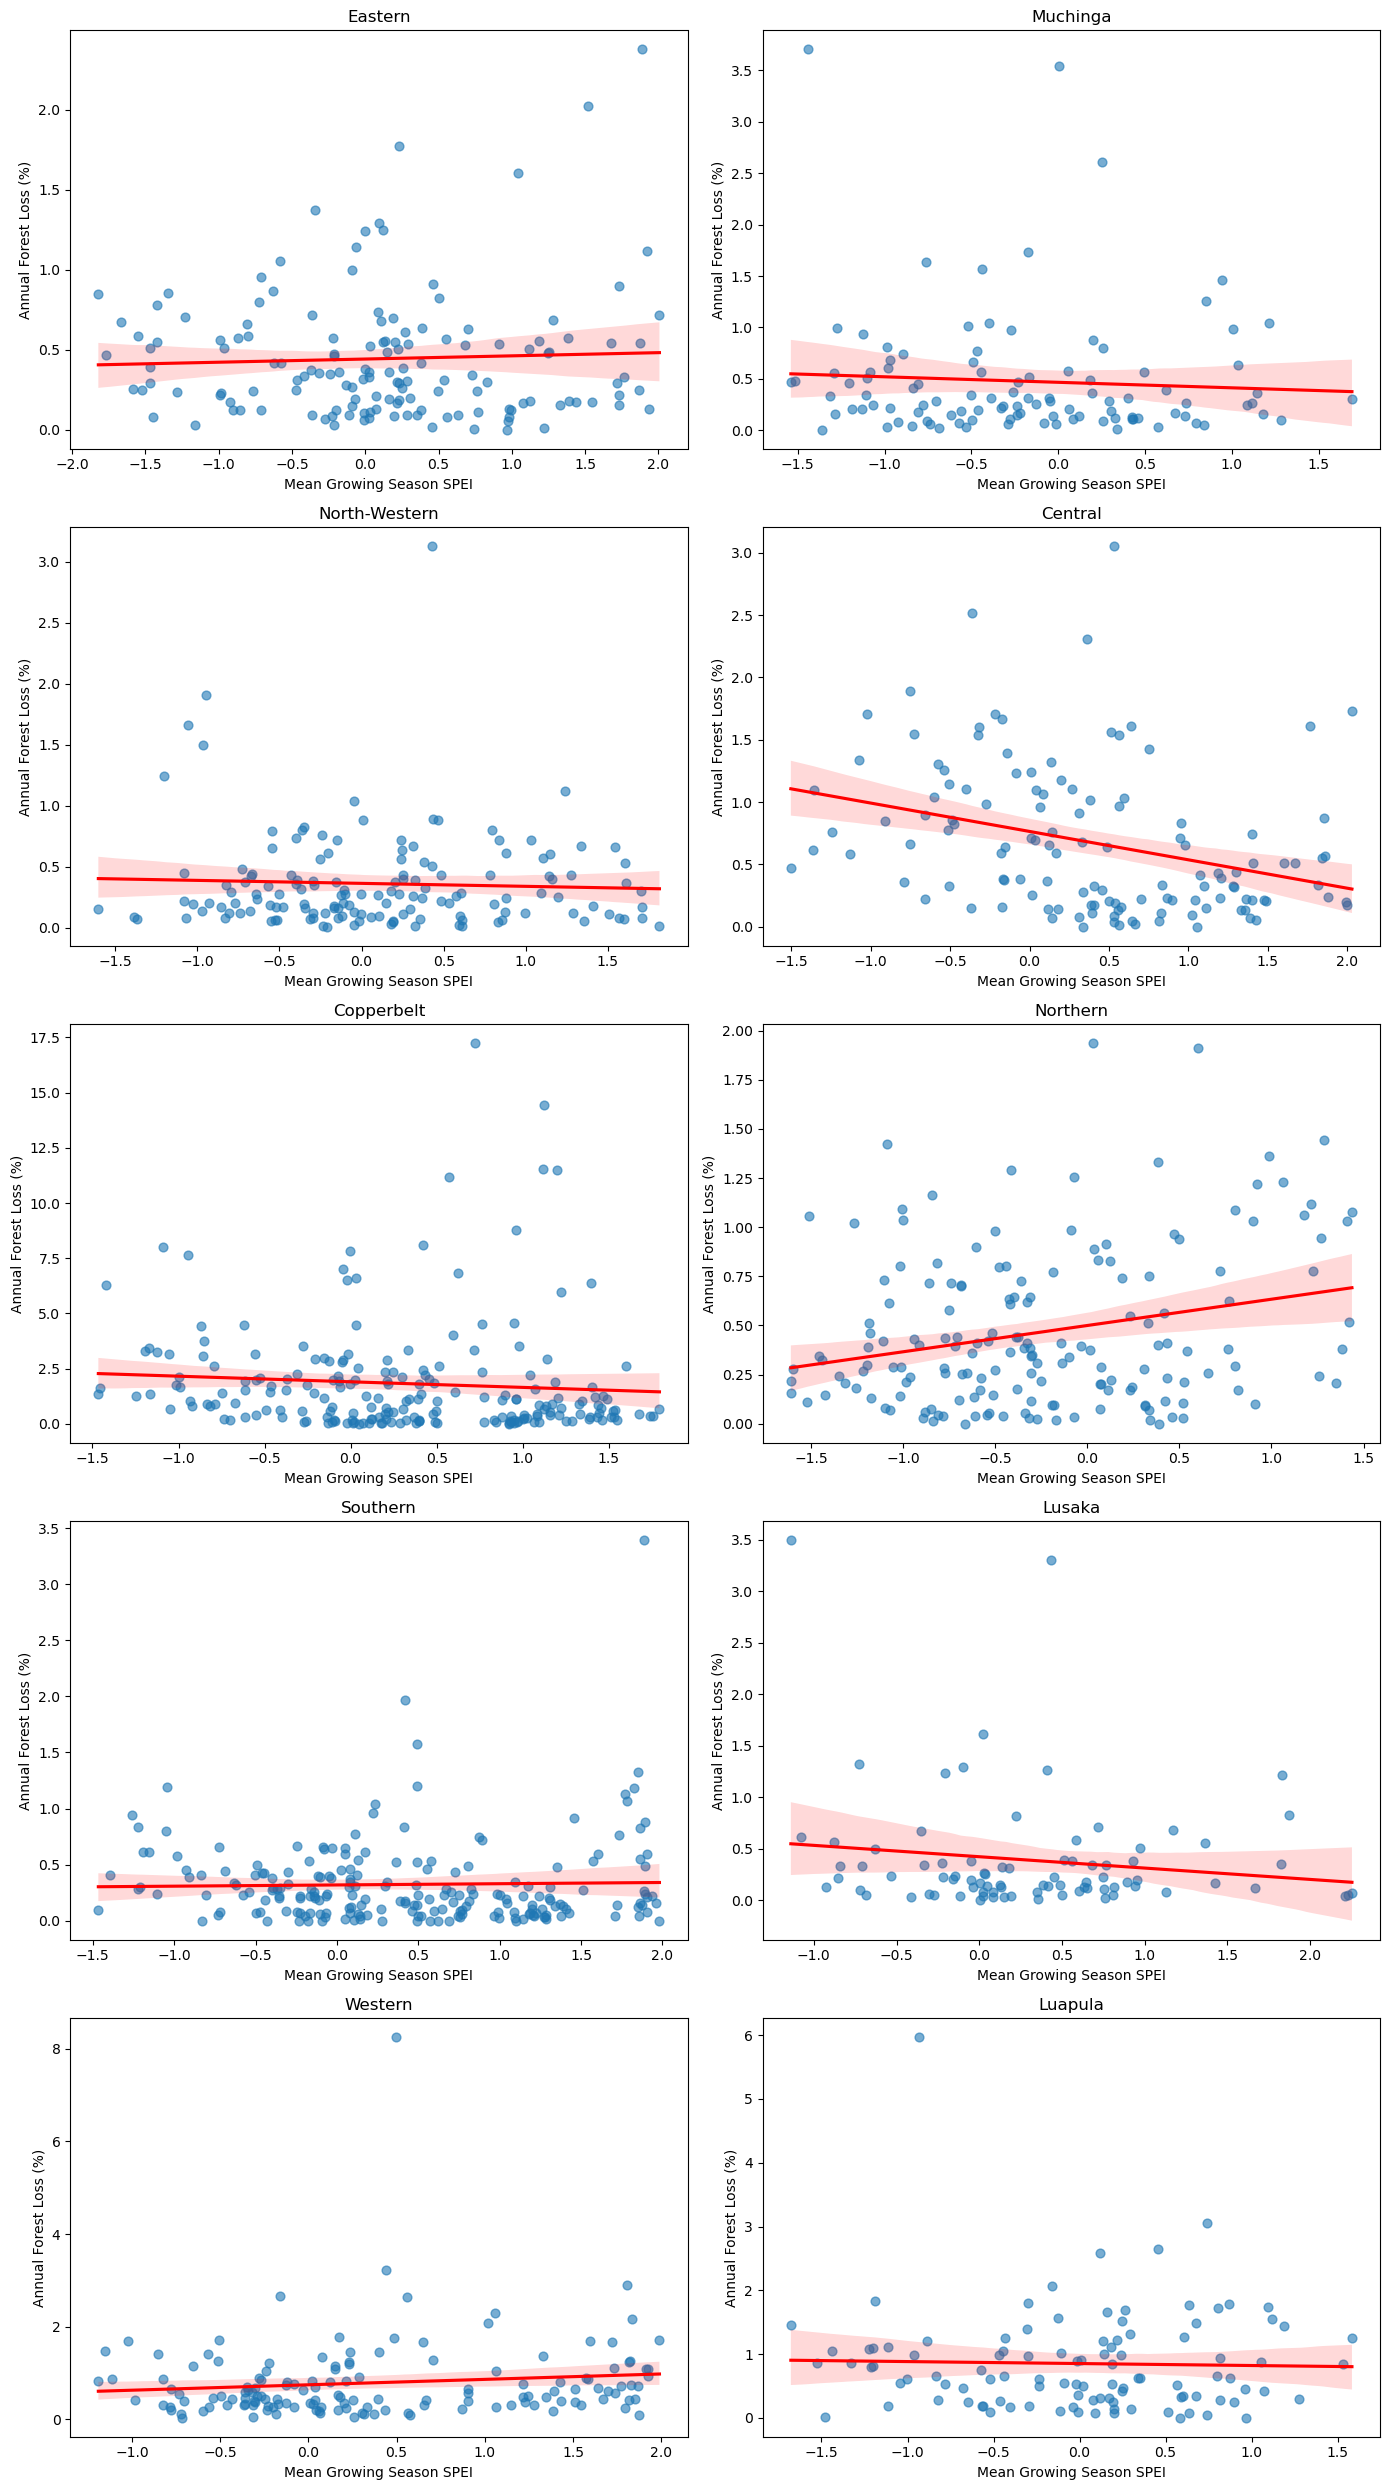

In [11]:
# drop rows with missing values (just to be safe)
plot_df = merged_df.dropna(subset=['district', 'mean_spei', 'percent_loss_annual', 'province'])

# get unique provinces
provinces = plot_df['province'].unique()

# set up plot grid
cols = 2
rows = (len(provinces) + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(7 * cols, 5 * rows), squeeze=False)
axes = axes.flatten()

# plot per province
for i, province in enumerate(provinces):
    ax = axes[i]
    province_data = plot_df[plot_df['province'] == province]

    sns.regplot(
        data=province_data,
        x='mean_spei',
        y='percent_loss_annual',
        scatter=True,
        scatter_kws={'alpha': 0.6, 's': 40},
        line_kws={'color': 'red'},
        ax=ax
    )

    ax.set_title(province)
    ax.set_xlabel('Mean Growing Season SPEI')
    ax.set_ylabel('Annual Forest Loss (%)')
    

# remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.show()

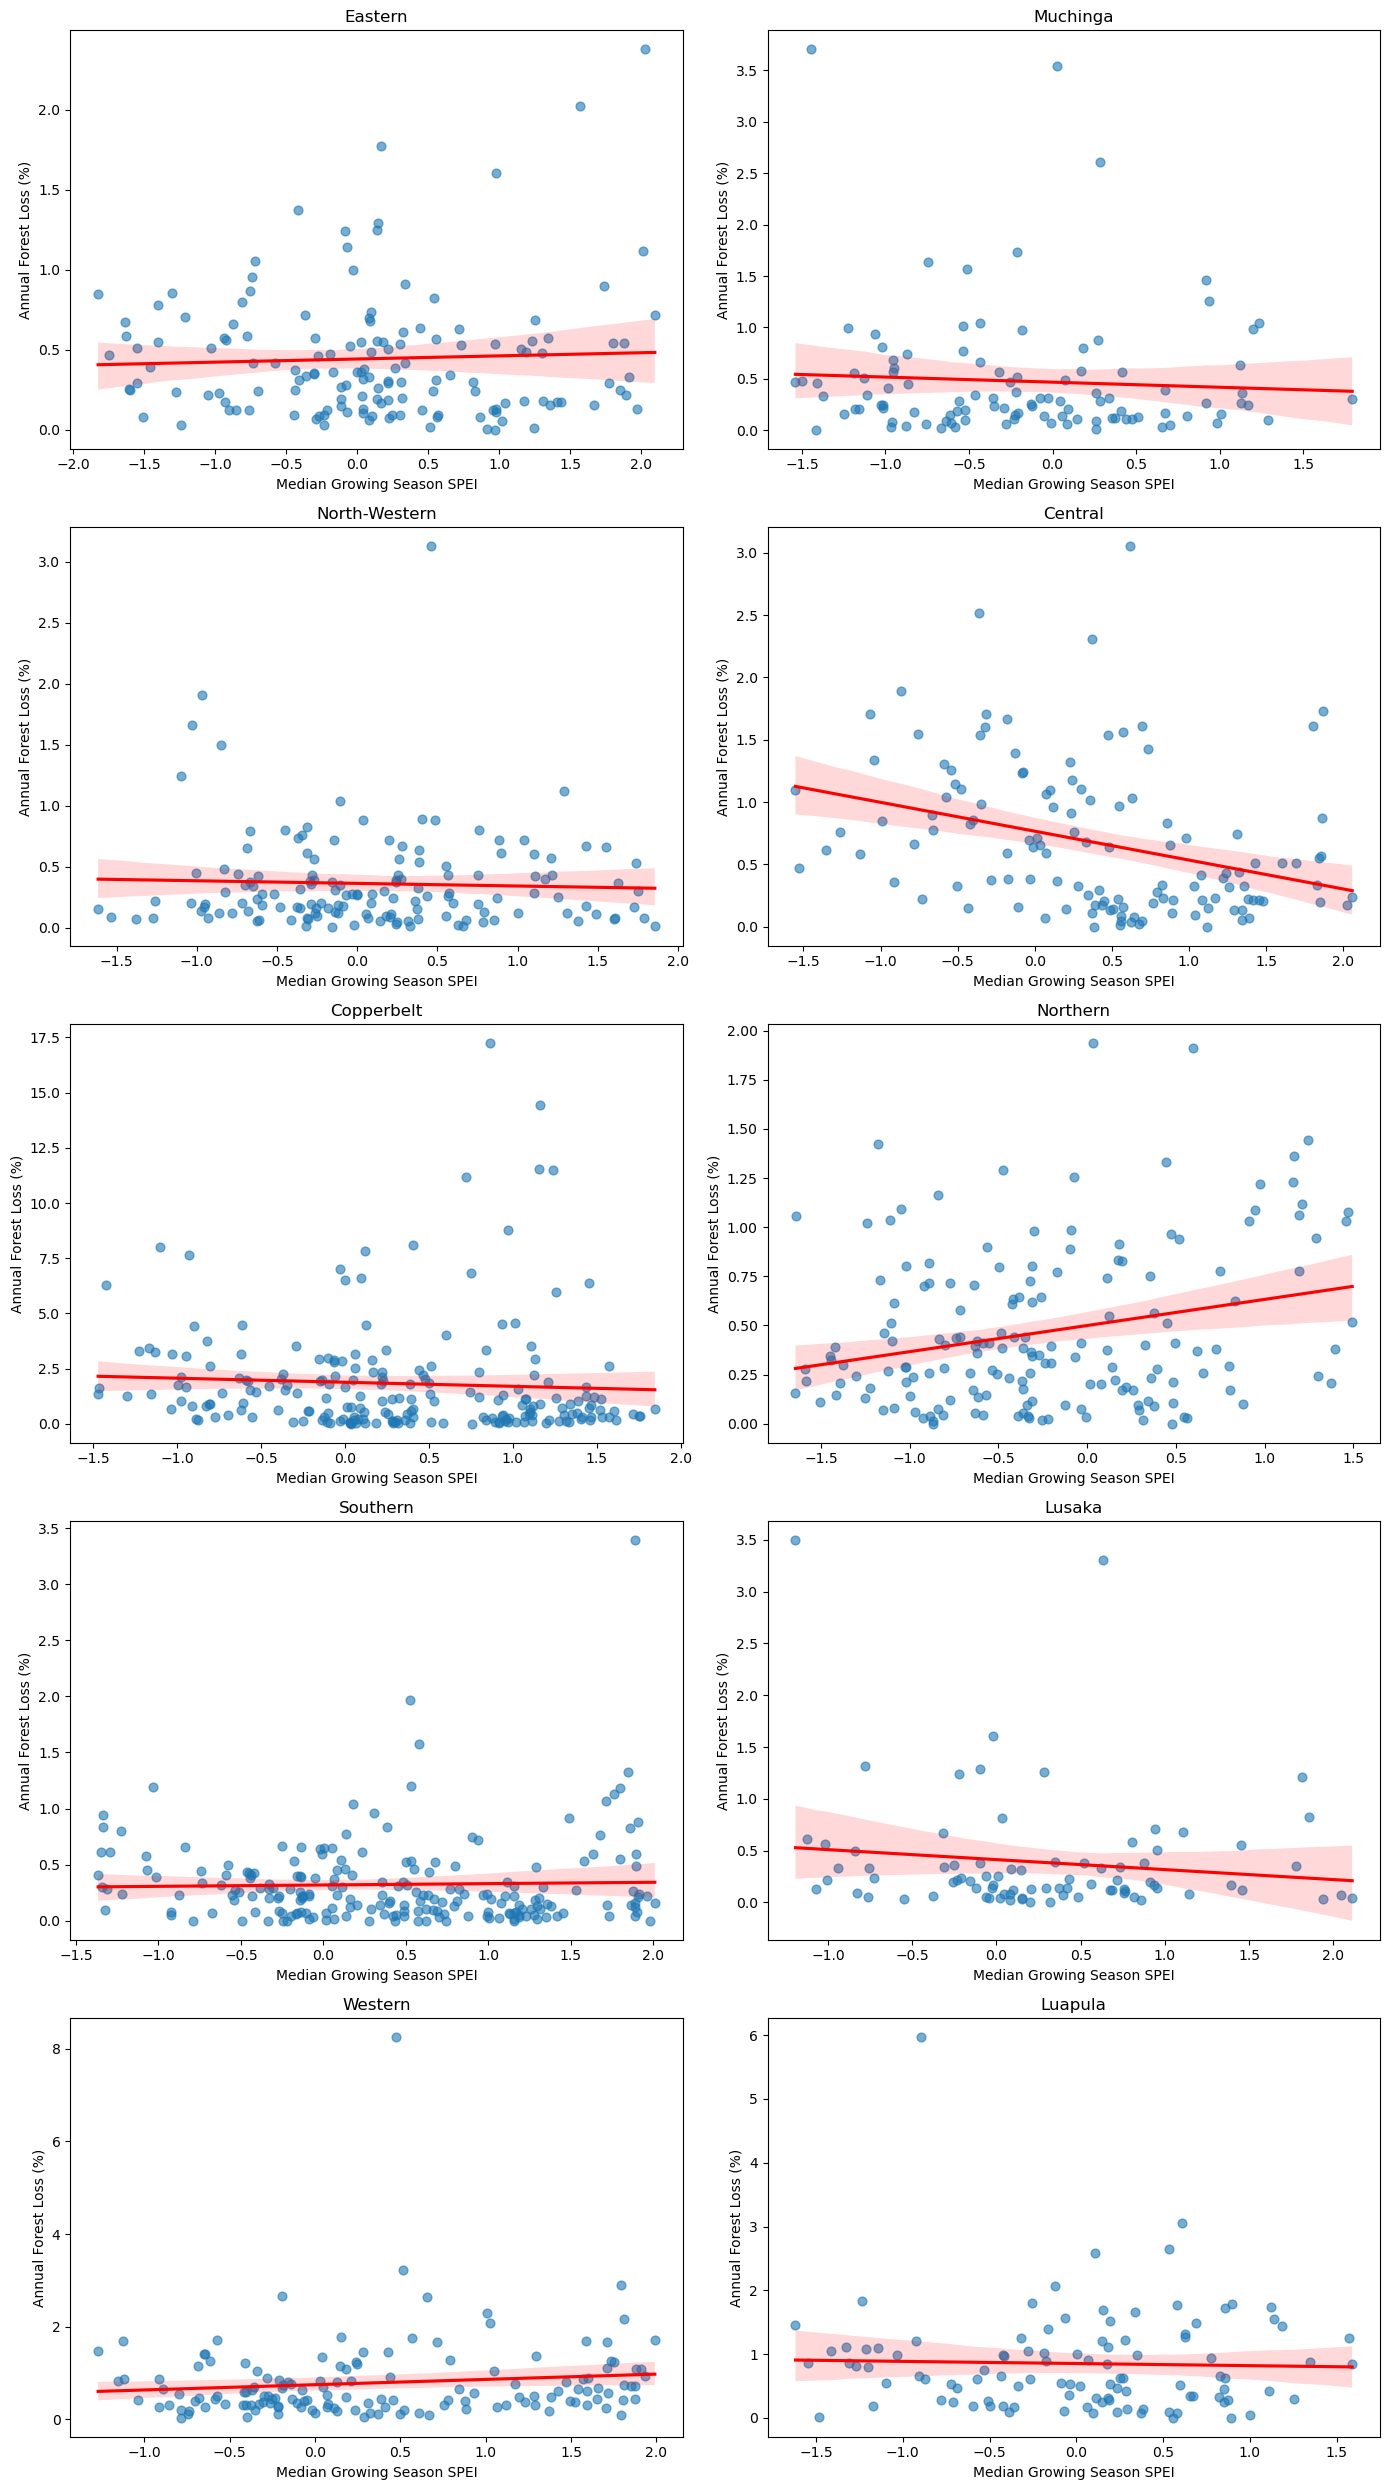

In [12]:
# drop rows with missing values (just to be safe)
plot_df = merged_df.dropna(subset=['district', 'median_spei', 'percent_loss_annual', 'province'])

# get unique provinces
provinces = plot_df['province'].unique()

# set up plot grid
cols = 2
rows = (len(provinces) + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(7 * cols, 5 * rows), squeeze=False)
axes = axes.flatten()

# plot per province
for i, province in enumerate(provinces):
    ax = axes[i]
    province_data = plot_df[plot_df['province'] == province]

    sns.regplot(
        data=province_data,
        x='median_spei',
        y='percent_loss_annual',
        scatter=True,
        scatter_kws={'alpha': 0.6, 's': 40},
        line_kws={'color': 'red'},
        ax=ax
    )

    ax.set_title(province)
    ax.set_xlabel('Median Growing Season SPEI')
    ax.set_ylabel('Annual Forest Loss (%)')
    

# remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.show()

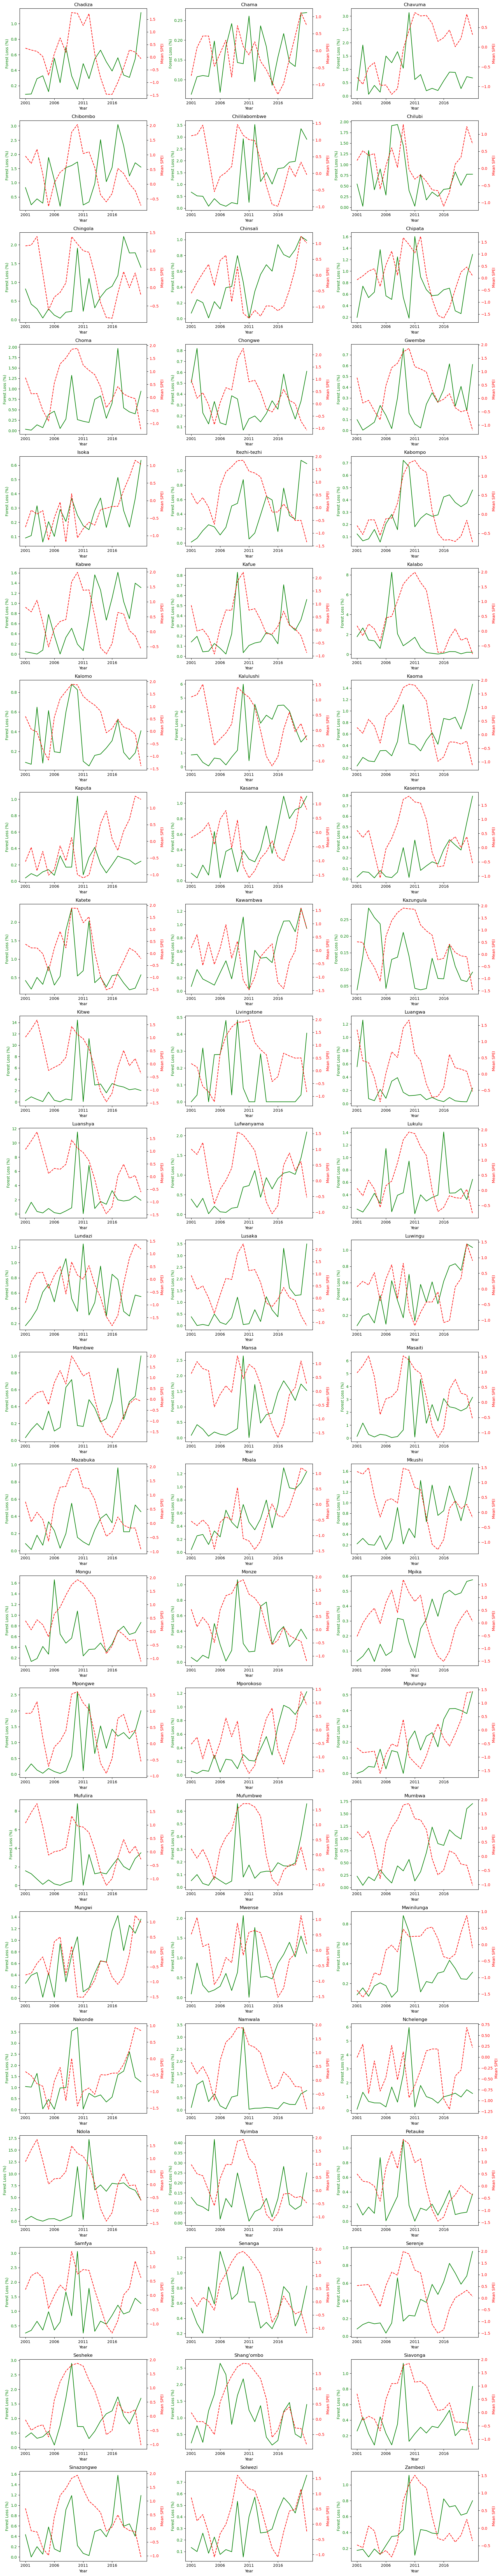

In [21]:
# Drop rows with missing values
plot_df = merged_df.dropna(subset=['district', 'year', 'mean_spei', 'percent_loss_annual'])
plot_df['year'] = plot_df['year'].astype(int)

# Get unique districts
districts = plot_df['district'].unique()

# Set up plot grid
cols = 3
rows = (len(districts) + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 4 * rows), squeeze=False)
axes = axes.flatten()

# Plot per district
for i, district in enumerate(districts):
    ax1 = axes[i]
    district_data = plot_df[plot_df['district'] == district].sort_values('year')
    
    # Plot mean SPEI (left y-axis)
    ax1.plot(district_data['year'], district_data['percent_loss_annual'], label='Forest Loss (%)', color='green')
    ax1.set_ylabel('Forest Loss (%)', color='green')
    ax1.tick_params(axis='y', labelcolor='green')

    # Plot forest loss (right y-axis)
    ax2 = ax1.twinx()
    ax2.plot(district_data['year'], district_data['mean_spei'], label='Mean SPEI', color='red', linestyle='--')
    ax2.set_ylabel('Mean SPEI', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    ax1.set_title(district)
    ax1.set_xlabel('Year')
    min_year = district_data['year'].min()
    max_year = district_data['year'].max()
    ax1.set_xticks(range(min_year, max_year, 5))

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.show()

## Growing Season SPEI vs. Total Forest Loss

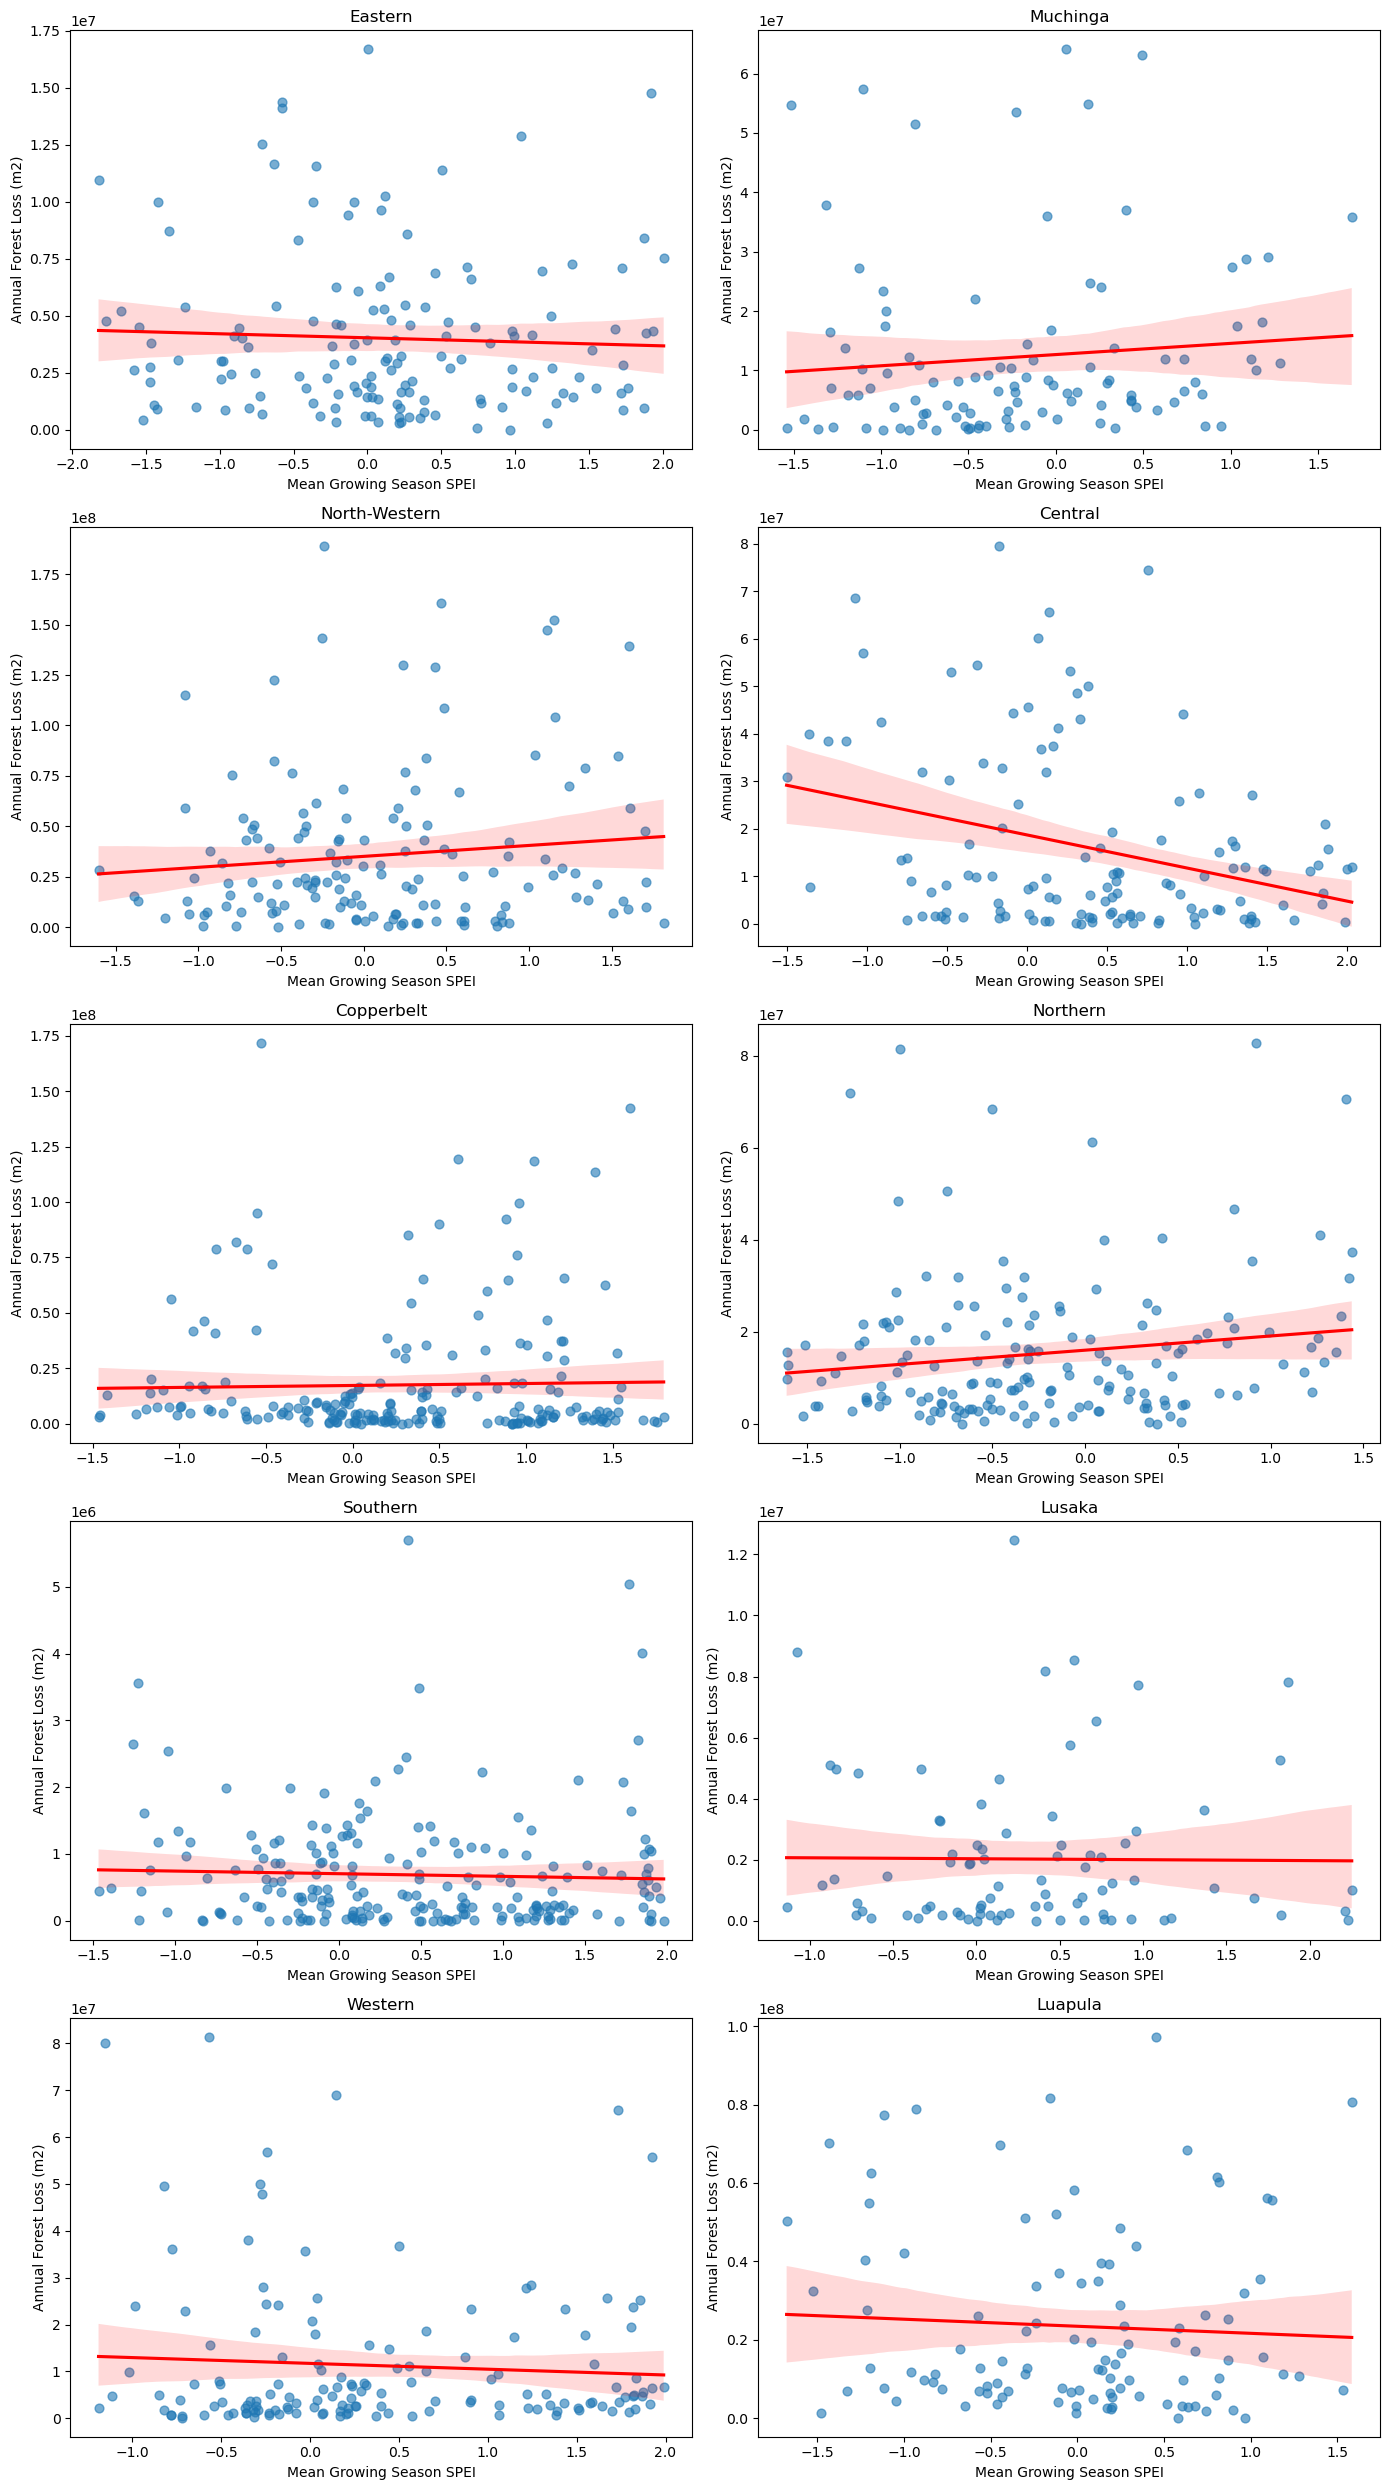

In [13]:
# drop rows with missing values (just to be safe)
plot_df = merged_df.dropna(subset=['district', 'mean_spei', 'loss_m2', 'province'])

# get unique provinces
provinces = plot_df['province'].unique()

# set up plot grid
cols = 2
rows = (len(provinces) + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(7 * cols, 5 * rows), squeeze=False)
axes = axes.flatten()

# plot per province
for i, province in enumerate(provinces):
    ax = axes[i]
    province_data = plot_df[plot_df['province'] == province]

    sns.regplot(
        data=province_data,
        x='mean_spei',
        y='loss_m2',
        scatter=True,
        scatter_kws={'alpha': 0.6, 's': 40},
        line_kws={'color': 'red'},
        ax=ax
    )

    ax.set_title(province)
    ax.set_xlabel('Mean Growing Season SPEI')
    ax.set_ylabel('Annual Forest Loss (m2)')
    

# remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.show()

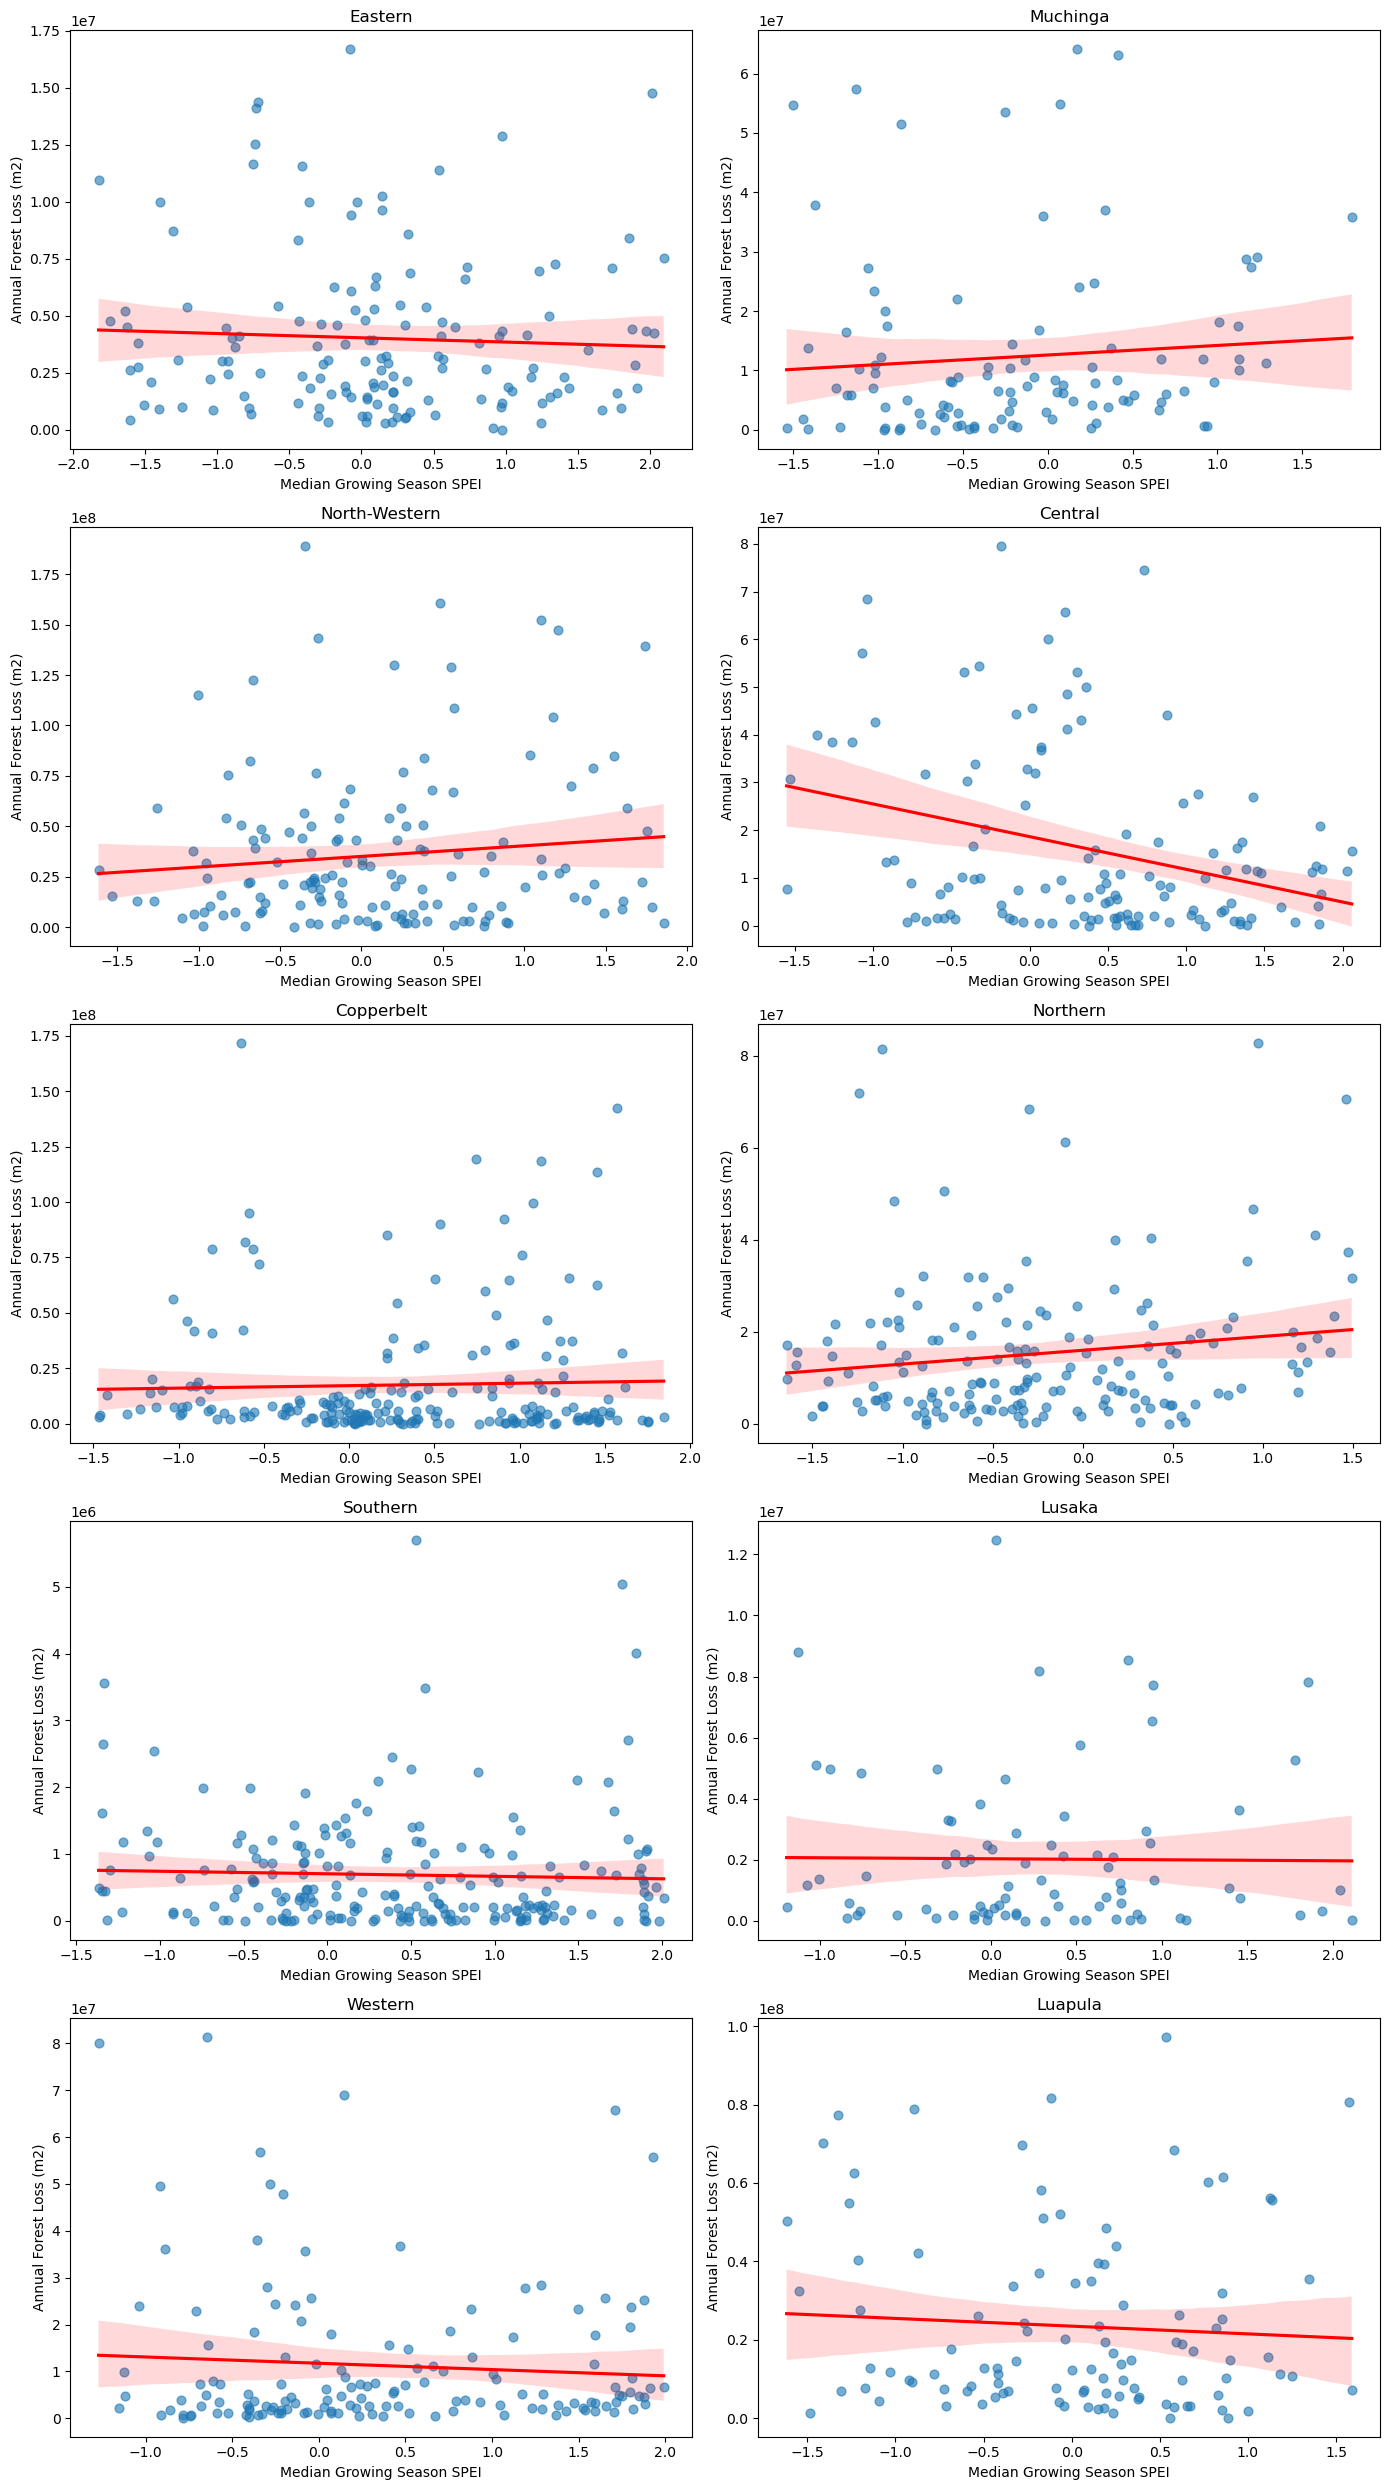

In [14]:
# drop rows with missing values (just to be safe)
plot_df = merged_df.dropna(subset=['district', 'median_spei', 'loss_m2', 'province'])

# get unique provinces
provinces = plot_df['province'].unique()

# set up plot grid
cols = 2
rows = (len(provinces) + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(7 * cols, 5 * rows), squeeze=False)
axes = axes.flatten()

# plot per province
for i, province in enumerate(provinces):
    ax = axes[i]
    province_data = plot_df[plot_df['province'] == province]

    sns.regplot(
        data=province_data,
        x='median_spei',
        y='loss_m2',
        scatter=True,
        scatter_kws={'alpha': 0.6, 's': 40},
        line_kws={'color': 'red'},
        ax=ax
    )

    ax.set_title(province)
    ax.set_xlabel('Median Growing Season SPEI')
    ax.set_ylabel('Annual Forest Loss (m2)')
    

# remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.show()